**Global Temperatures**

In [1]:
#load the local data
from google.colab import files
uploaded = files.upload()

Saving GlobalTemperatures.csv to GlobalTemperatures.csv


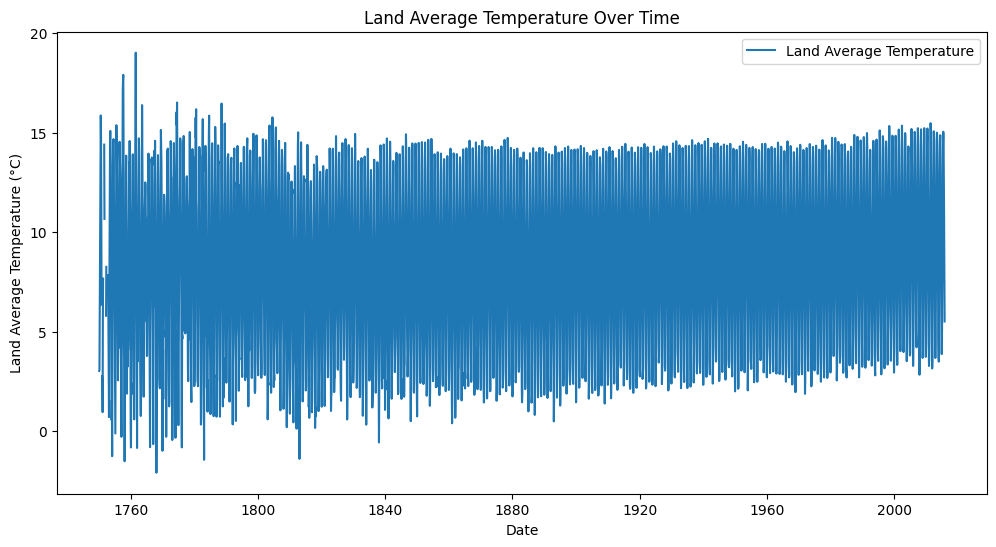

In [2]:
#Visualize the data using matplotlib
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('GlobalTemperatures.csv')
data['dt'] = pd.to_datetime(data['dt'])

# Plot LandAverageTemperature against dt
plt.figure(figsize=(12, 6))
plt.plot(data['dt'], data['LandAverageTemperature'], label='Land Average Temperature')
plt.xlabel('Date')
plt.ylabel('Land Average Temperature (°C)')
plt.title('Land Average Temperature Over Time')
plt.legend()
plt.show()

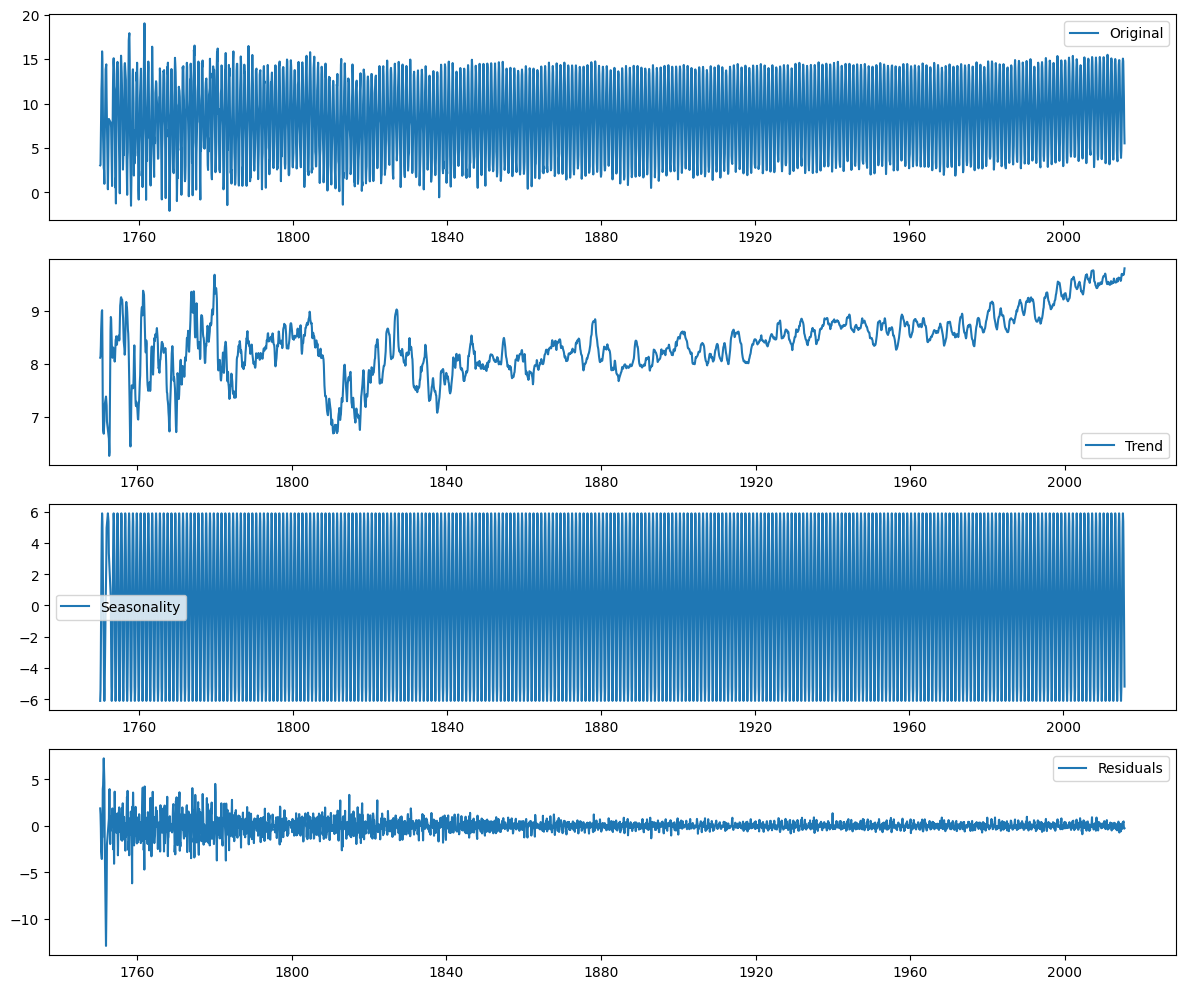

In [3]:
# Decompose the data to see any trend or seasonality
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
data.set_index('dt', inplace=True)
data = data['LandAverageTemperature'].dropna()  # Drop missing values for decomposition

# Decompose the time series
decomposition = seasonal_decompose(data, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(data, label='Original')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

data = pd.read_csv('GlobalTemperatures.csv')

# Convert the 'dt' column to datetime format
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)

# Select the 'LandAverageTemperature' column and drop missing values
temperature_data = data['LandAverageTemperature'].dropna()

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(temperature_data)

# Print the ADF test results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -3.9916775743515487
p-value: 0.001454722381905835
Critical Values:
   1%: -3.432427002601706
   5%: -2.8624576920765237
   10%: -2.5672585088743345


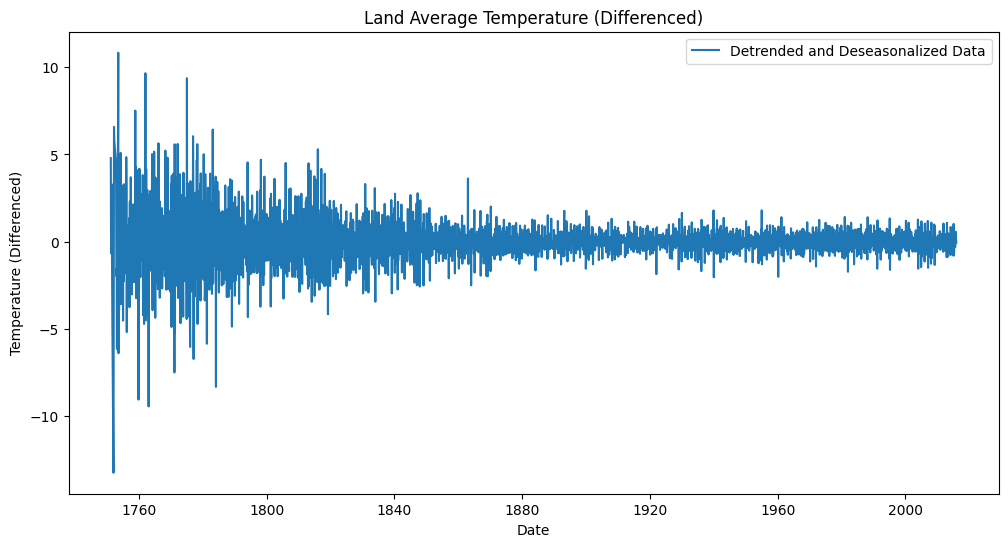

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('GlobalTemperatures.csv')

# Convert the 'dt' column to datetime format and set it as the index
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)

# Select the 'LandAverageTemperature' column and drop missing values
temperature_data = data['LandAverageTemperature'].dropna()

# Differencing to remove trend (first-order difference)
data_diff = temperature_data.diff().dropna()

# Seasonal differencing (e.g., 12 months for yearly seasonality)
data_diff_seasonal = data_diff.diff(12).dropna()

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(data_diff_seasonal, label='Detrended and Deseasonalized Data')
plt.xlabel('Date')
plt.ylabel('Temperature (Differenced)')
plt.title('Land Average Temperature (Differenced)')
plt.legend()
plt.show()


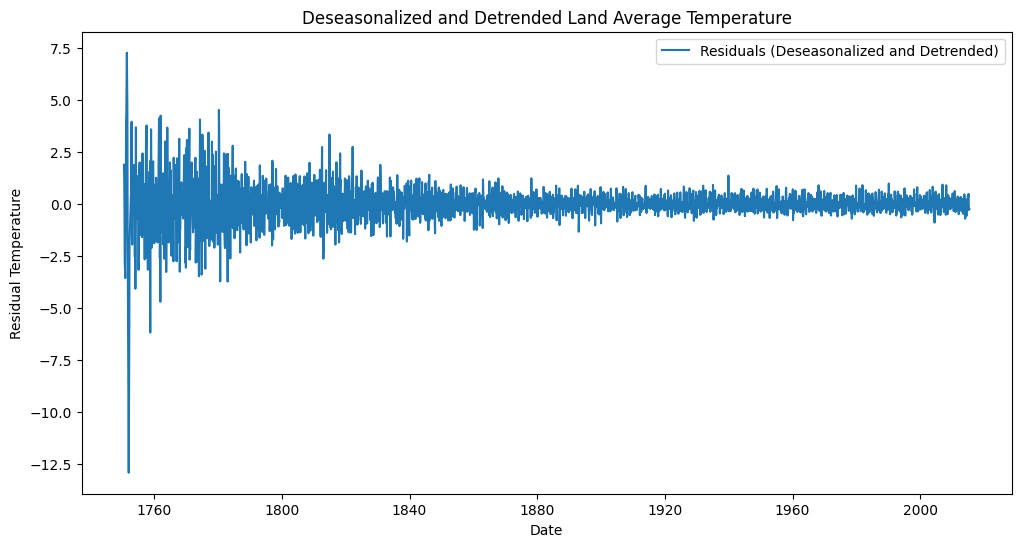

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(temperature_data, model='additive', period=12)

# Extract the residuals (data without trend and seasonality)
residuals = decomposition.resid.dropna()

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals (Deseasonalized and Detrended)')
plt.xlabel('Date')
plt.ylabel('Residual Temperature')
plt.title('Deseasonalized and Detrended Land Average Temperature')
plt.legend()
plt.show()


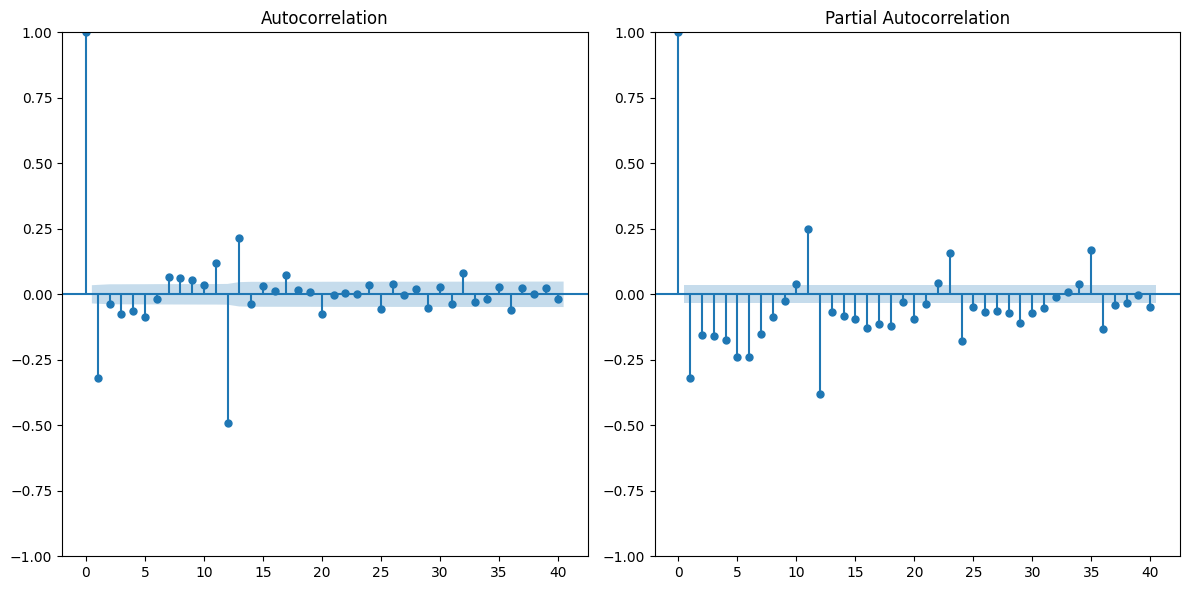

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the CSV file
data = pd.read_csv('GlobalTemperatures.csv')

# Convert the 'dt' column to datetime format and set it as the index
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)

# Select the 'LandAverageTemperature' column and drop missing values
temperature_data = data['LandAverageTemperature'].dropna()

# Differencing to remove trend and seasonality
data_diff = temperature_data.diff().dropna()
data_diff_seasonal = data_diff.diff(12).dropna()

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data_diff_seasonal, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(data_diff_seasonal, lags=40, ax=plt.gca())
plt.tight_layout()
plt.show()


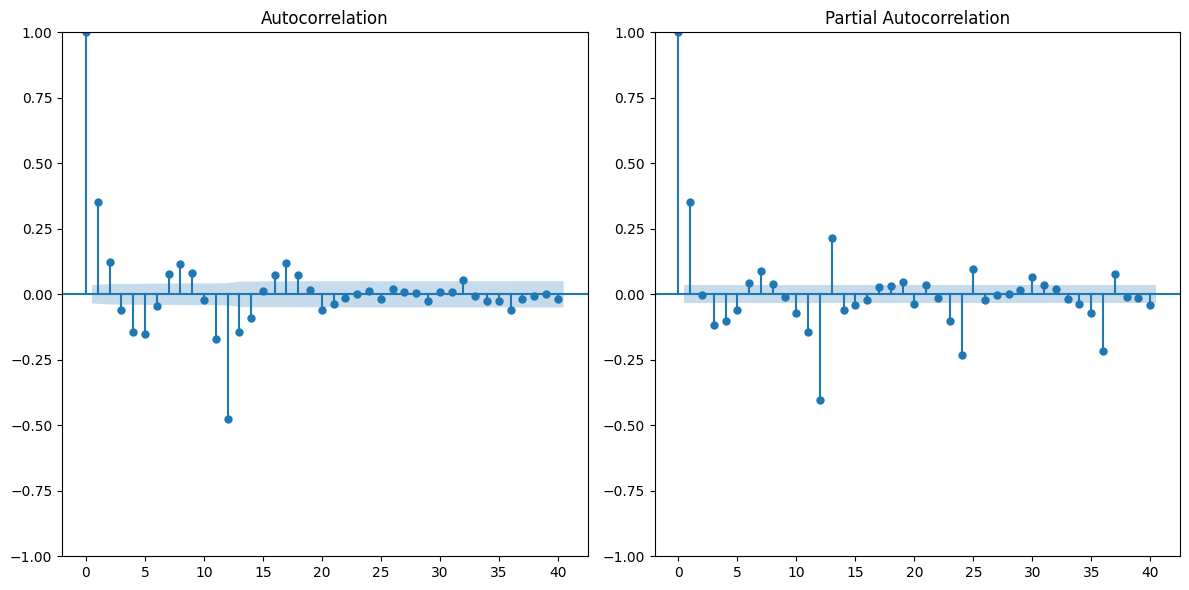

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the CSV file and set datetime index
data = pd.read_csv('GlobalTemperatures.csv')
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)

# Select the 'LandAverageTemperature' column and drop missing values
temperature_data = data['LandAverageTemperature'].dropna()

# Seasonal differencing (to remove annual seasonality)
data_diff_seasonal = temperature_data.diff(12).dropna()

# Plot ACF and PACF for seasonal differenced data
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data_diff_seasonal, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(data_diff_seasonal, lags=40, ax=plt.gca())
plt.tight_layout()
plt.show()


In [9]:
!pip install pmdarima
from pmdarima import auto_arima

# Automatically determine best SARIMA parameters
auto_model = auto_arima(temperature_data,
                        seasonal=True,
                        m=12,
                        d=1,
                        D=1,
                        start_p=1, max_p=1,
                        start_q=0, max_q=2,
                        start_P=1, max_P=1,
                        start_Q=1, max_Q=1,
                        trace=True,
                        stepwise=True)  # Stepwise search can be faster
print(auto_model.summary())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10764.742, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9476.561, Time=2.55 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=6.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10421.972, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=3.47 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=9817.002, Time=0.99 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=19.15 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=7.95 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=9478.560, Time=5.58 sec

Best model:  ARIMA(1,1,0)(1,1,0)[12]          
Total fit time: 51.072 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observ

In [12]:
import statsmodels.api as sm

model1 = sm.tsa.SARIMAX(temperature_data, order=(1,1,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
print(results1.aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


7633.661164285175


<Figure size 1000x500 with 0 Axes>

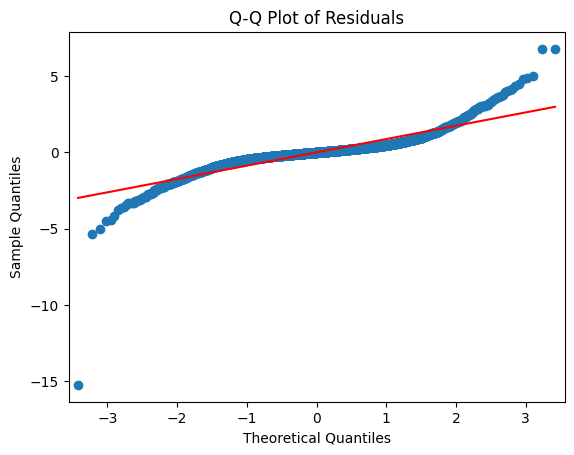

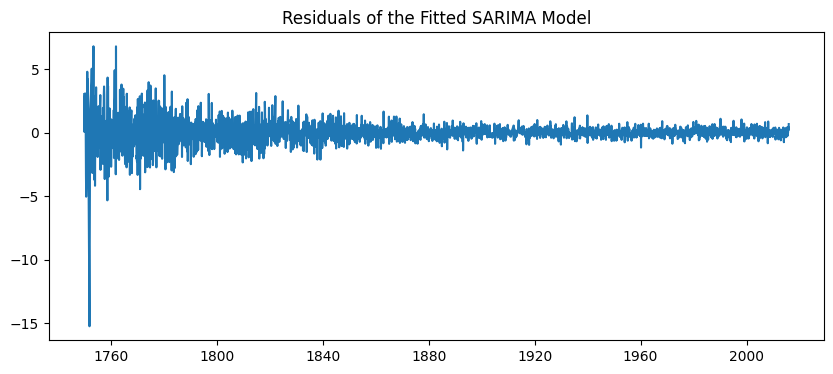

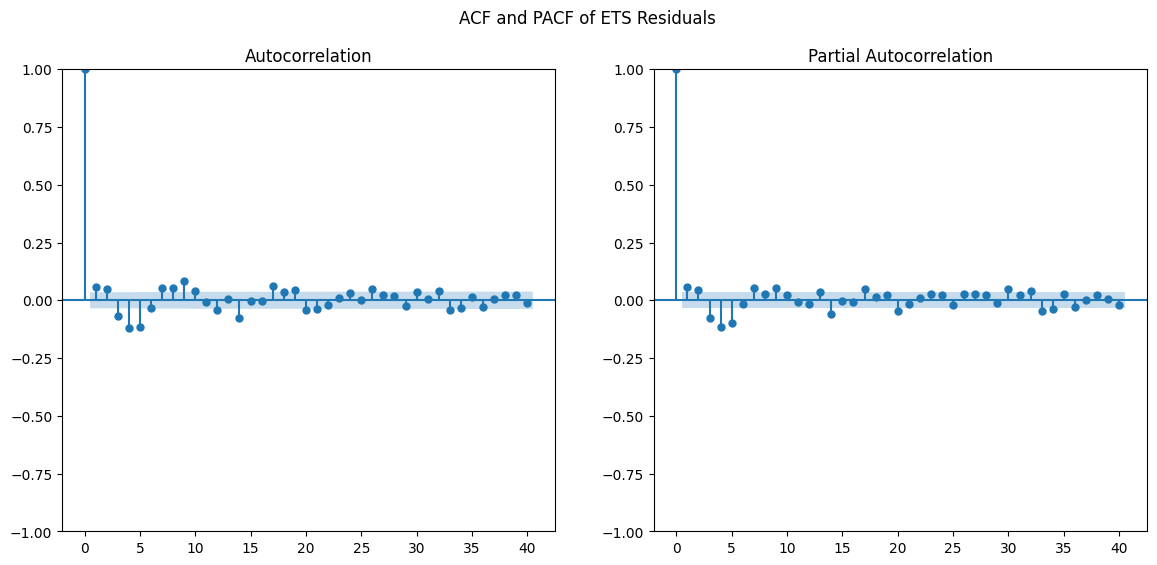

Ljung-Box Test Results:
       lb_stat     lb_pvalue
10  174.797947  2.812057e-32
15  200.235387  1.903110e-34
20  228.548796  2.335166e-37


In [15]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Q-Q plot for residuals
residuals = results1.resid
plt.figure(figsize=(10, 5))
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Plot residuals over time
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Residuals of the Fitted SARIMA Model")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
plt.suptitle("ACF and PACF of ETS Residuals")
plt.show()

# Ljung-Box test for autocorrelation
ljung_box_result = acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_result)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 10.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 13185088319.27061
Iteration:      2,   Func. Count:     14,   Neg. LLF: 68508087062.95756
Iteration:      3,   Func. Count:     22,   Neg. LLF: 191171200.89366162
Iteration:      4,   Func. Count:     28,   Neg. LLF: 6018.689511608763
Iteration:      5,   Func. Count:     33,   Neg. LLF: 5997.214137442806
Iteration:      6,   Func. Count:     38,   Neg. LLF: 31622.753088275855
Iteration:      7,   Func. Count:     47,   Neg. LLF: 5988.680584640493
Iteration:      8,   Func. Count:     52,   Neg. LLF: 6309.444601953709
Iteration:      9,   Func. Count:     58,   Neg. LLF: 12935.11016529605
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6205.894647317645
Iteration:     11,   Func. Count:     70,   Neg. LLF: 6147.254344325534
Iteration:     12,   Func. Count:     76,   Neg. LLF: 6081.809311314157
Iteration:     13,   Func. Count:     82,   Neg. LLF: 6067.796821432546
Iteration:     14,   Func. Count:     88,   Neg. LLF: 6016.856

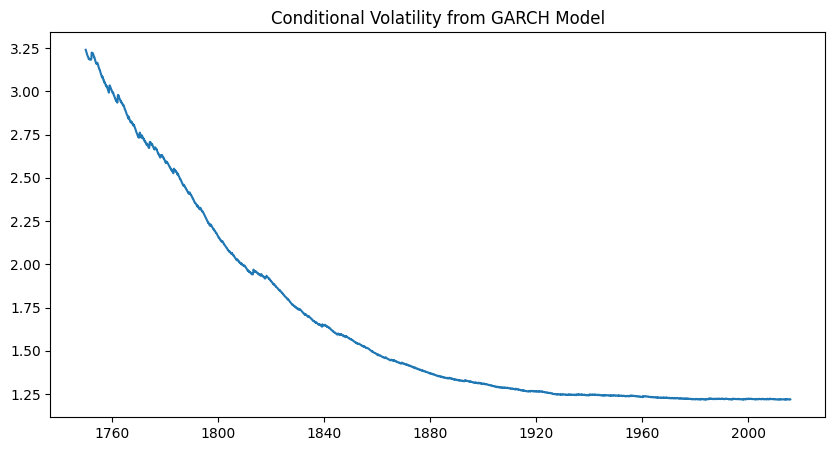

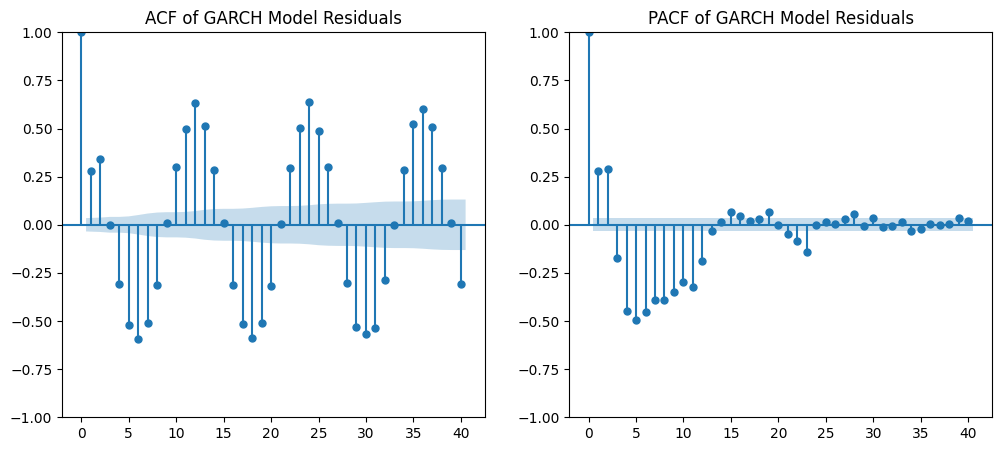

<Figure size 600x600 with 0 Axes>

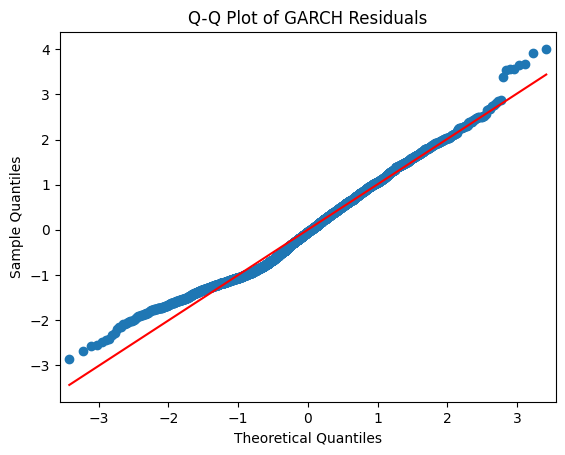

Ljung-Box Test Results:
         lb_stat  lb_pvalue
10   4331.626618        0.0
15   7491.285834        0.0
20  10907.787265        0.0


In [ ]:
!pip install arch
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Load the data
data = pd.read_csv('GlobalTemperatures.csv')
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)
temperature_data = data['LandAverageTemperature'].dropna()

# Step 1: Fit an ARIMA model to obtain residuals
# Fit a basic ARIMA model to the temperature data as a baseline model
arima_model = sm.tsa.ARIMA(temperature_data, order=(1, 1, 1))  # Adjust ARIMA order if needed
arima_results = arima_model.fit()

# Get residuals from the ARIMA model
arima_residuals = arima_results.resid

# Step 2: Fit a GARCH(1,1) model on the residuals to model time-varying volatility
# ARCH/GARCH models assume residuals are mean-centered, so ensure they're centered around zero
arima_residuals_centered = arima_residuals - arima_residuals.mean()

# Fit a GARCH(1,1) model on the residuals
garch_model = arch_model(arima_residuals_centered, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()

# Summary of the GARCH model
print(garch_results.summary())

# Step 3: Plotting GARCH model volatility (conditional standard deviations)
plt.figure(figsize=(10, 5))
plt.plot(garch_results.conditional_volatility)
plt.title("Conditional Volatility from GARCH Model")
plt.show()

# Step 4: Residual Analysis
# ACF and PACF of GARCH residuals (standardized residuals)
garch_residuals = garch_results.std_resid  # Standardized residuals from GARCH

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(garch_residuals, lags=40, ax=ax[0])
plot_pacf(garch_residuals, lags=40, ax=ax[1])
ax[0].set_title("ACF of GARCH Model Residuals")
ax[1].set_title("PACF of GARCH Model Residuals")
plt.show()

# Q-Q Plot for GARCH residuals
plt.figure(figsize=(6, 6))
sm.qqplot(garch_residuals, line='s')
plt.title("Q-Q Plot of GARCH Residuals")
plt.show()

# Step 5: Ljung-Box Test for remaining autocorrelation in the residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(garch_residuals, lags=[10, 15, 20], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_test)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimal GARCH order is GARCH(1, 1) with AIC=11958.86751089362
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5975.43
Distribution:                  Normal   AIC:                           11958.9
Method:            Maximum Likelihood   BIC:                           11983.1
                                        No. Observations:                 3180
Date:                Mon, Nov 25 2024   Df Residuals:                     3179
Time:                        06:45:43   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
---------------------------------------------------------------------

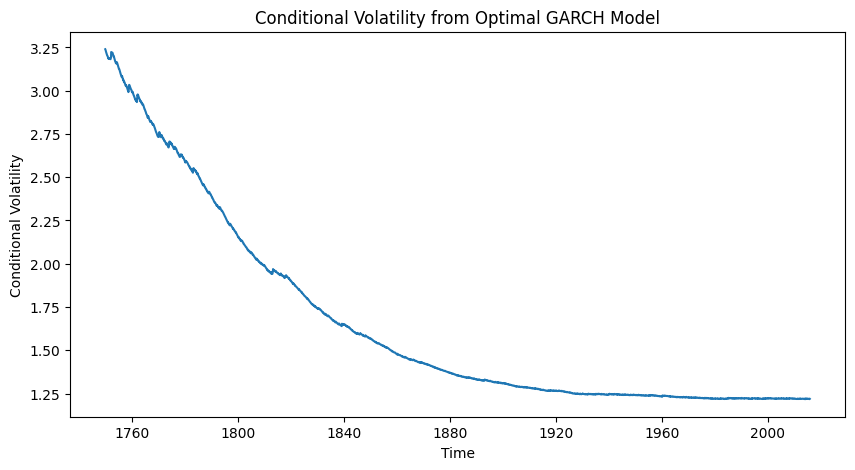

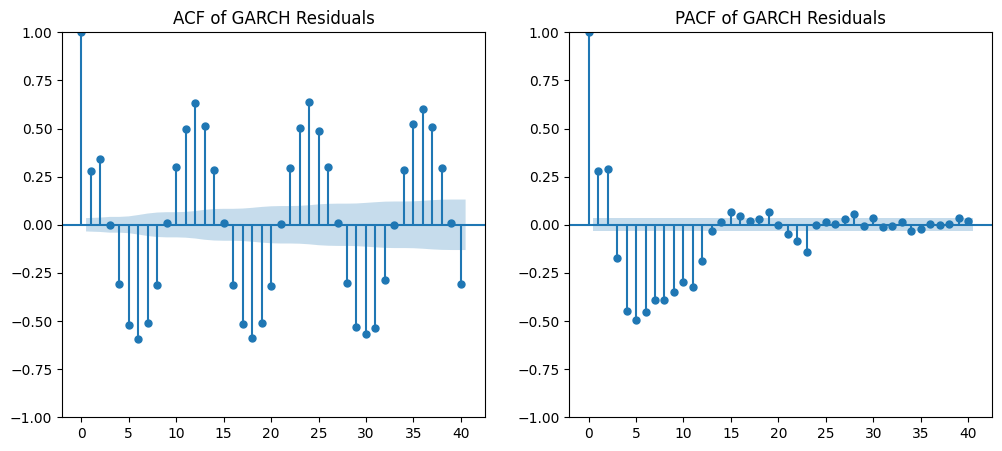

<Figure size 600x600 with 0 Axes>

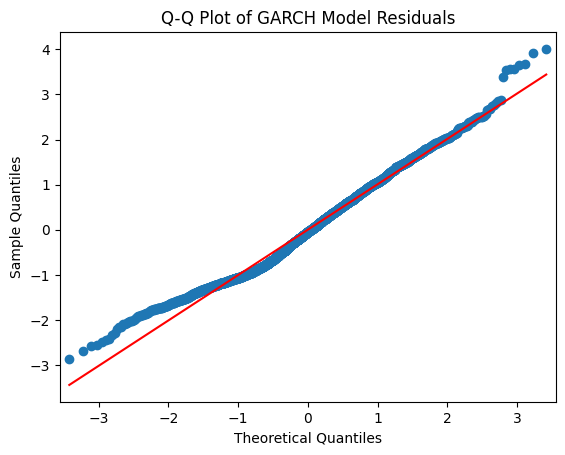

Ljung-Box Test Results:
         lb_stat  lb_pvalue
10   4331.626618        0.0
15   7491.285834        0.0
20  10907.787265        0.0


In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
import statsmodels.api as sm

# Load the data
data = pd.read_csv('GlobalTemperatures.csv')
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)
temperature_data = data['LandAverageTemperature'].dropna()

# Step 1: Fit an ARIMA model to get the residuals
# We'll start with a simple ARIMA model (adjust the order as needed)
arima_model = sm.tsa.ARIMA(temperature_data, order=(1, 1, 1))  # Use an appropriate order for your data
arima_results = arima_model.fit()
arima_residuals = arima_results.resid - arima_results.resid.mean()  # Center residuals around zero

# Step 2: Define a range of GARCH (p, q) orders to evaluate
best_aic = np.inf
best_order = None
best_model = None

# Test different GARCH(p, q) combinations, up to p=3 and q=3
for p in range(1, 4):
    for q in range(1, 4):
        try:
            # Fit the GARCH model
            garch_model = arch_model(arima_residuals, vol='Garch', p=p, q=q)
            garch_results = garch_model.fit(disp="off")  # Suppress output

            # Check the AIC value and retain the best model
            if garch_results.aic < best_aic:
                best_aic = garch_results.aic
                best_order = (p, q)
                best_model = garch_results
        except Exception as e:
            print(f"Model GARCH({p},{q}) failed to fit: {e}")

# Output the best model order and its AIC
print(f"Optimal GARCH order is GARCH{best_order} with AIC={best_aic}")
print(best_model.summary())

# Step 3: Plot the conditional volatility from the best model
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(best_model.conditional_volatility)
plt.title("Conditional Volatility from Optimal GARCH Model")
plt.xlabel("Time")
plt.ylabel("Conditional Volatility")
plt.show()

# Step 4: Residual Analysis of the GARCH Model
# ACF and PACF plots of the standardized residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

garch_residuals = best_model.std_resid

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(garch_residuals, lags=40, ax=ax[0])
plot_pacf(garch_residuals, lags=40, ax=ax[1])
ax[0].set_title("ACF of GARCH Residuals")
ax[1].set_title("PACF of GARCH Residuals")
plt.show()

# Q-Q plot to check for normality of residuals
import statsmodels.api as sm
plt.figure(figsize=(6, 6))
sm.qqplot(garch_residuals, line='s')
plt.title("Q-Q Plot of GARCH Model Residuals")
plt.show()

# Ljung-Box test for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(garch_residuals, lags=[10, 15, 20], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_test)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


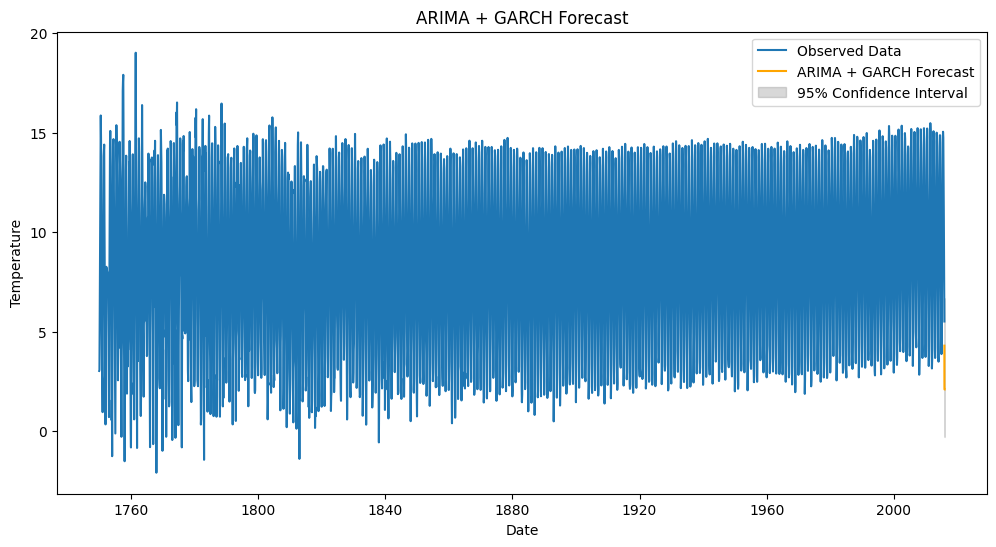

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the number of steps to forecast
forecast_steps = 30  # Adjust as needed

# Step 2: Forecast using the ARIMA model to get the mean forecast
arima_forecast = arima_results.get_forecast(steps=forecast_steps)
arima_mean_forecast = arima_forecast.predicted_mean  # Mean level forecast
arima_ci = arima_forecast.conf_int()  # Confidence intervals for mean forecast

# Step 3: Forecast using the GARCH model to get volatility (variance) forecast
garch_forecast = best_model.forecast(horizon=forecast_steps)
garch_volatility_forecast = garch_forecast.variance.values[-1, :] ** 0.5  # Convert to standard deviation

# Step 4: Combine the mean forecast with GARCH forecast volatility
# The forecasted values will have ARIMA mean plus or minus GARCH volatility for uncertainty bounds
forecast_index = pd.date_range(start=temperature_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Forecast upper and lower bounds by combining ARIMA mean and GARCH volatility forecasts
forecast_upper = arima_mean_forecast + 1.96 * garch_volatility_forecast
forecast_lower = arima_mean_forecast - 1.96 * garch_volatility_forecast

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label='Observed Data')
plt.plot(forecast_index, arima_mean_forecast, label='ARIMA + GARCH Forecast', color='orange')
plt.fill_between(forecast_index, forecast_lower, forecast_upper, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title("ARIMA + GARCH Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


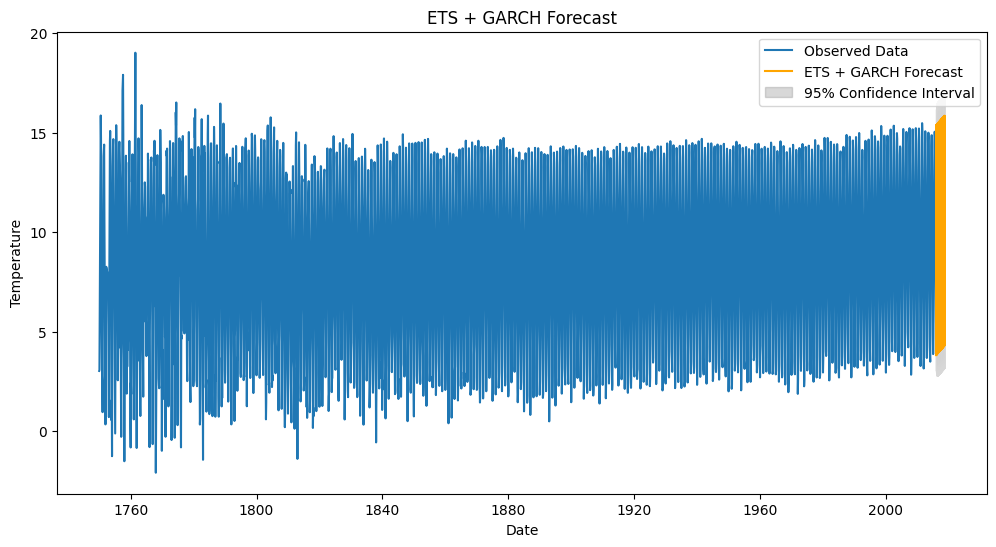

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('GlobalTemperatures.csv')
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)
temperature_data = data['LandAverageTemperature'].dropna()

# Step 1: Fit an ETS model to the data
# Select the model's trend, seasonal, and smoothing parameters as needed
ets_model = ExponentialSmoothing(temperature_data, trend='add', seasonal='add', seasonal_periods=12).fit()
ets_forecast = ets_model.forecast(steps=1000)  # Define forecast horizon

# Extract ETS residuals to model with GARCH
ets_residuals = ets_model.resid - ets_model.resid.mean()  # Center residuals

# Step 2: Fit a GARCH model on the ETS residuals to model volatility
# This example uses GARCH(1,1) but you can iterate over (p, q) for best fit
garch_model = arch_model(ets_residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(disp="off")

# Forecast volatility using the GARCH model
garch_forecast = garch_results.forecast(horizon=1000)  # Match ETS forecast horizon
garch_volatility_forecast = garch_forecast.variance.values[-1, :] ** 0.5  # Convert to standard deviation

# Step 3: Combine the ETS forecast with GARCH volatility forecast
forecast_index = pd.date_range(start=temperature_data.index[-1] + pd.Timedelta(days=1), periods=1000, freq='D')

# Upper and lower confidence bounds for the forecast
forecast_upper = ets_forecast + 1.96 * garch_volatility_forecast
forecast_lower = ets_forecast - 1.96 * garch_volatility_forecast


forecast_results = pd.DataFrame({
    'Forecast': ets_forecast,
    'Lower Bound (95%)': forecast_lower,
    'Upper Bound (95%)': forecast_upper
}, index=forecast_index)

#print(forecast_results)
# Plot the observed data, forecast, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label='Observed Data')
plt.plot(forecast_index, ets_forecast, label='ETS + GARCH Forecast', color='orange')
plt.fill_between(forecast_index, forecast_lower, forecast_upper, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title("ETS + GARCH Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


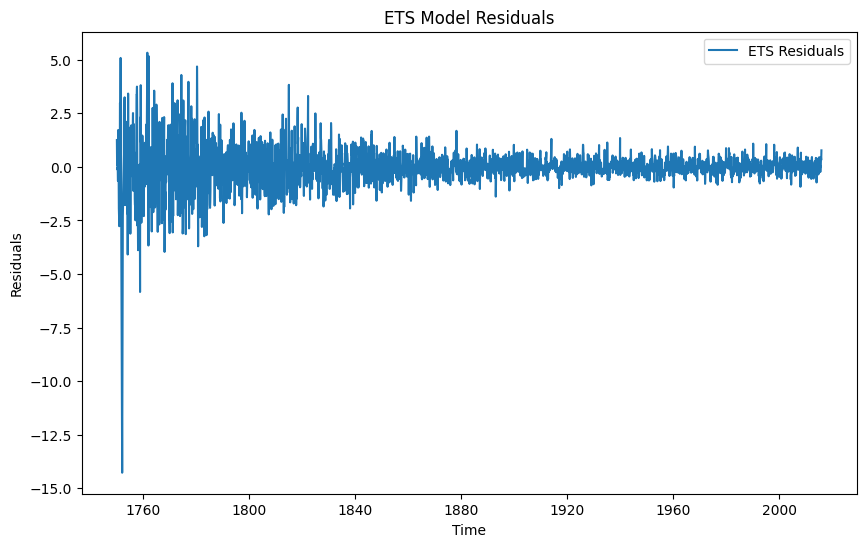

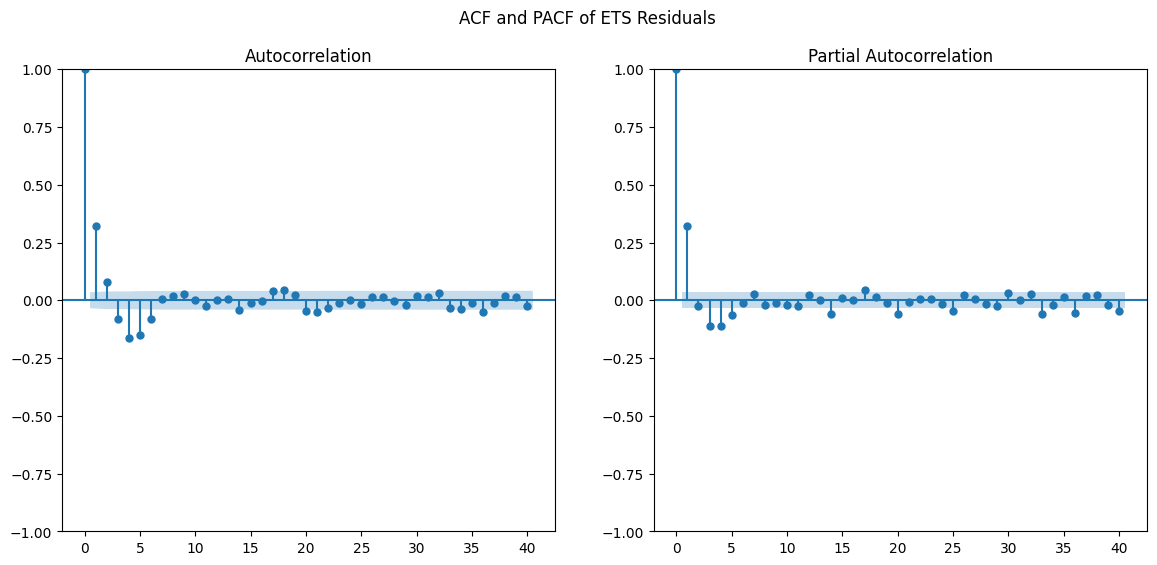

Ljung-Box test for ETS residuals:
       lb_stat      lb_pvalue
20  583.059995  1.061909e-110


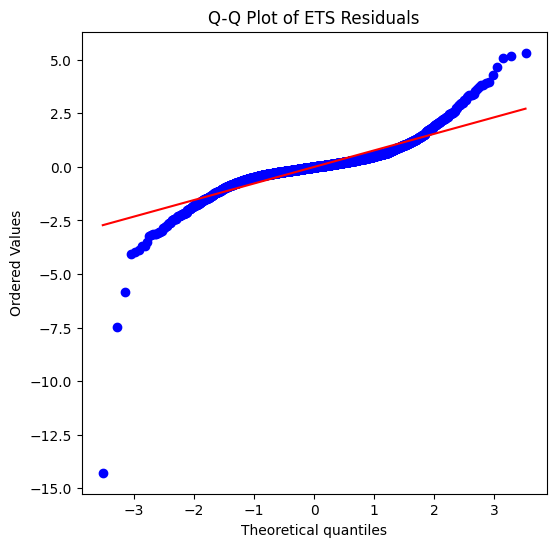

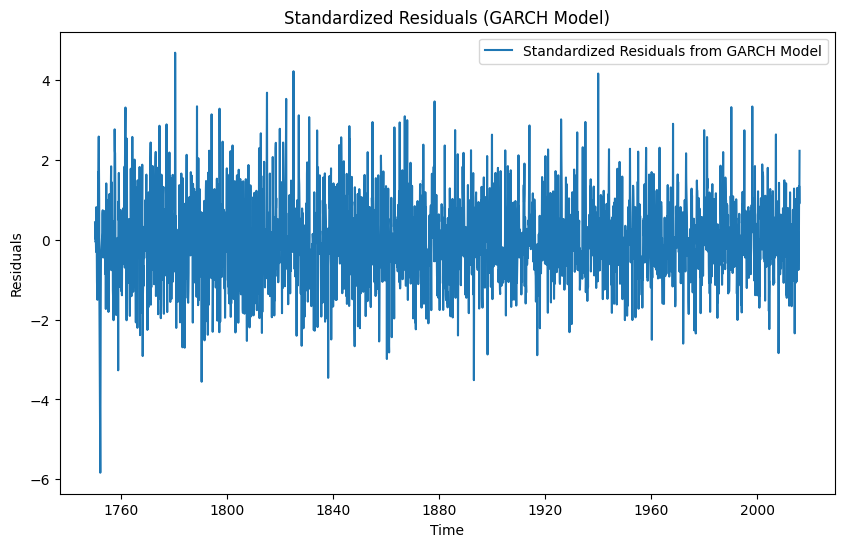

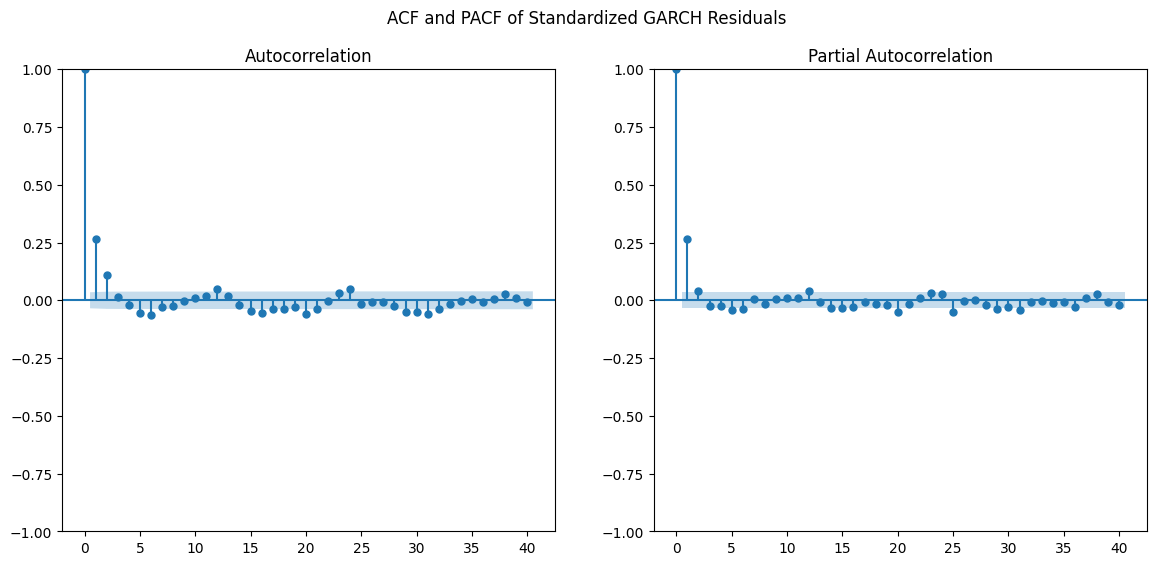

Ljung-Box test for GARCH standardized residuals:
       lb_stat     lb_pvalue
20  341.409269  2.616611e-60


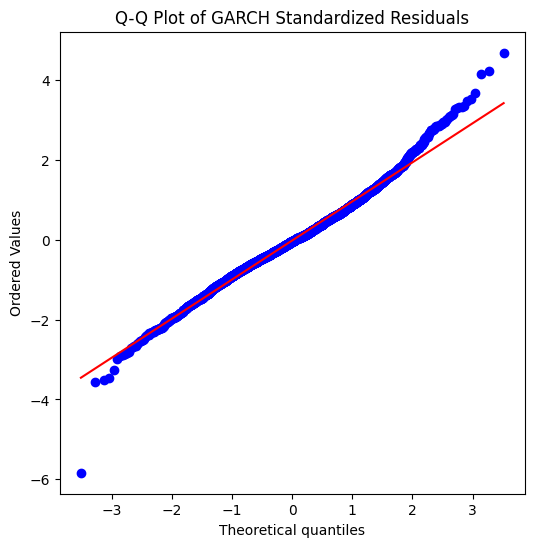

In [ ]:
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

# Step 1: ETS Residual Analysis
ets_residuals = ets_model.resid  # Residuals from the fitted ETS model

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(ets_residuals, label="ETS Residuals")
plt.title("ETS Model Residuals")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# ACF and PACF of the residuals
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sm.graphics.tsa.plot_acf(ets_residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(ets_residuals, lags=40, ax=ax[1])
plt.suptitle("ACF and PACF of ETS Residuals")
plt.show()

# Ljung-Box test for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(ets_residuals, lags=[20], return_df=True)
print("Ljung-Box test for ETS residuals:")
print(ljung_box_results)

# Q-Q plot for normality of residuals
plt.figure(figsize=(6, 6))
stats.probplot(ets_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of ETS Residuals")
plt.show()

# Step 2: GARCH Residual Analysis
# Extract the standardized residuals (after fitting the GARCH model)
garch_standardized_residuals = garch_results.resid / garch_results.conditional_volatility

# Plot the standardized residuals
plt.figure(figsize=(10, 6))
plt.plot(garch_standardized_residuals, label="Standardized Residuals from GARCH Model")
plt.title("Standardized Residuals (GARCH Model)")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# ACF and PACF of the GARCH standardized residuals
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sm.graphics.tsa.plot_acf(garch_standardized_residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(garch_standardized_residuals, lags=40, ax=ax[1])
plt.suptitle("ACF and PACF of Standardized GARCH Residuals")
plt.show()

# Ljung-Box test for autocorrelation in GARCH standardized residuals
ljung_box_results_garch = acorr_ljungbox(garch_standardized_residuals, lags=[20], return_df=True)
print("Ljung-Box test for GARCH standardized residuals:")
print(ljung_box_results_garch)

# Q-Q plot for normality of GARCH residuals
plt.figure(figsize=(6, 6))
stats.probplot(garch_standardized_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of GARCH Standardized Residuals")
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                            Unobserved Components Results                            
Dep. Variable:        LandAverageTemperature   No. Observations:                 3180
Model:                           local level   Log Likelihood               -3825.359
                   + stochastic seasonal(12)   AIC                           7660.717
                                     + AR(1)   BIC                           7691.022
Date:                       Mon, 25 Nov 2024   HQIC                          7671.588
Time:                               06:29:59                                         
Sample:                                    0                                         
                                      - 3180                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

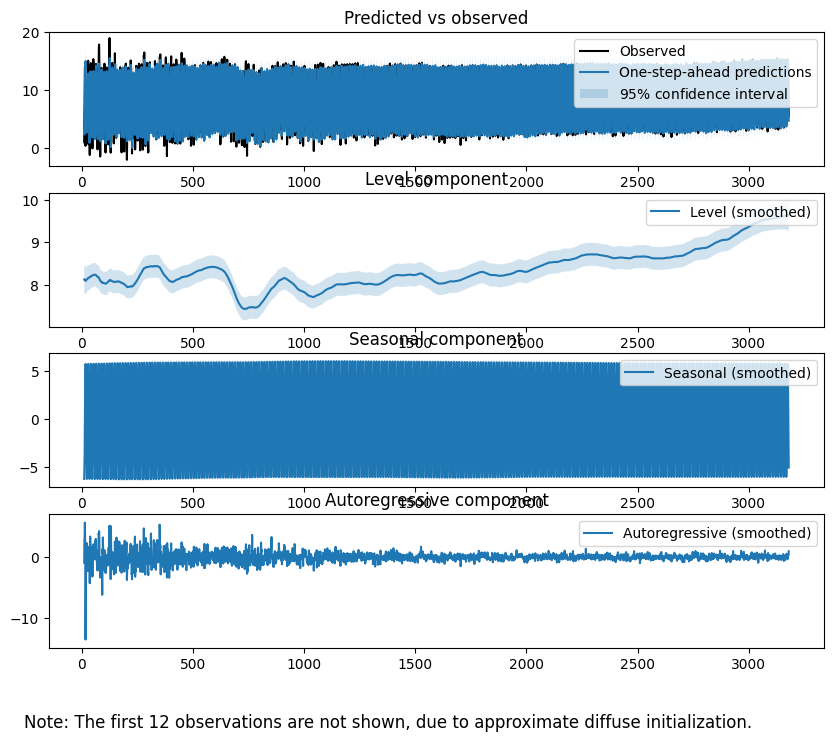

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


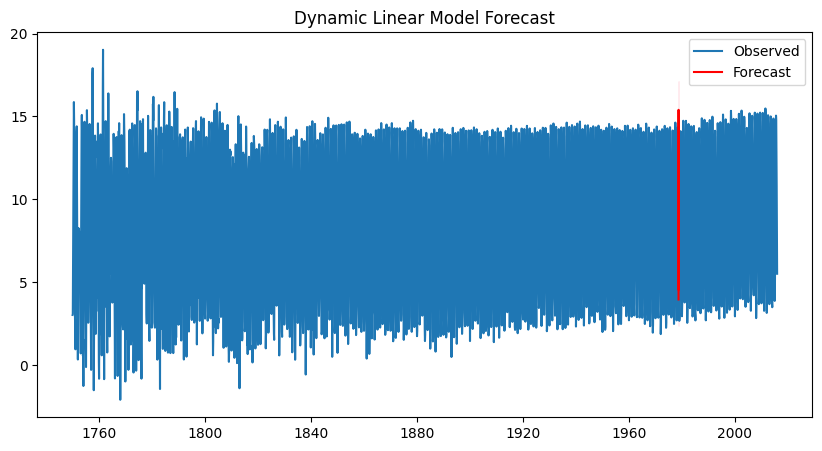

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm

# Load the data
data = pd.read_csv('GlobalTemperatures.csv')
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)
temperature_data = data['LandAverageTemperature'].dropna()

# Step 1: Define the DLM Model
# We will specify a local level trend, seasonal component, and potentially autoregressive component
dlm_model = UnobservedComponents(
    temperature_data,
    level='local level',   # Allow for a changing trend over time
    seasonal=12,           # Monthly data with annual seasonality
    autoregressive=1       # Add AR(1) term to model residuals
)

# Step 2: Fit the DLM model
dlm_results = dlm_model.fit()

# Step 3: Summarize the Results
print(dlm_results.summary())

# Step 4: Plot the Fitted Values and the Components
dlm_results.plot_components(figsize=(10, 8))
plt.show()

# Step 5: Forecasting
# Forecast the next 12 months
forecast_steps = 12
dlm_forecast = dlm_results.get_forecast(steps=forecast_steps)
forecast_mean = dlm_forecast.predicted_mean
forecast_conf_int = dlm_forecast.conf_int()

# Plot the original data and forecast
plt.figure(figsize=(10, 5))
plt.plot(temperature_data, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Dynamic Linear Model Forecast")
plt.legend()
plt.show()


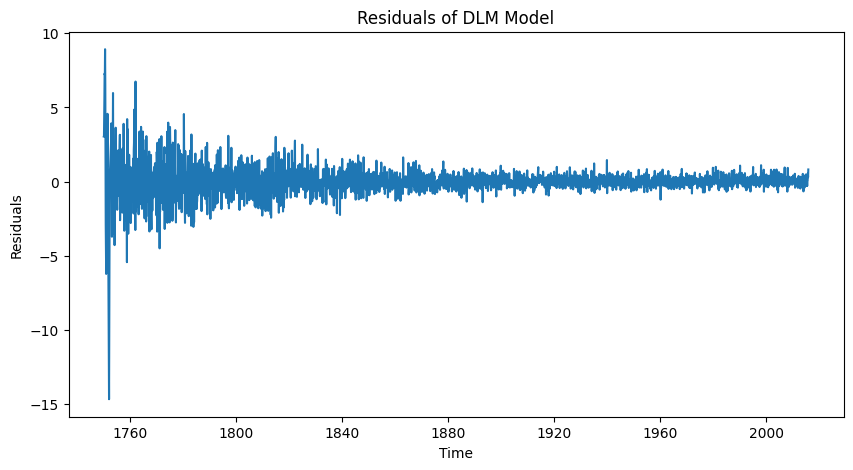

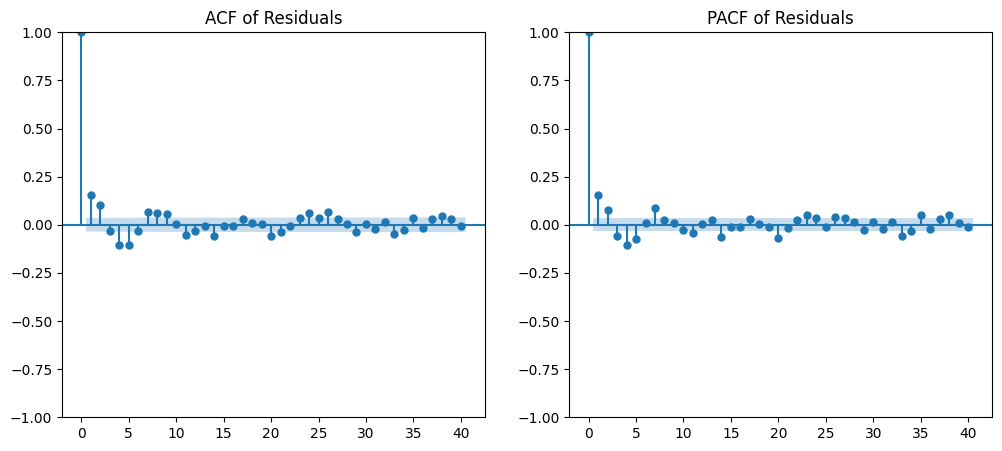

<Figure size 600x600 with 0 Axes>

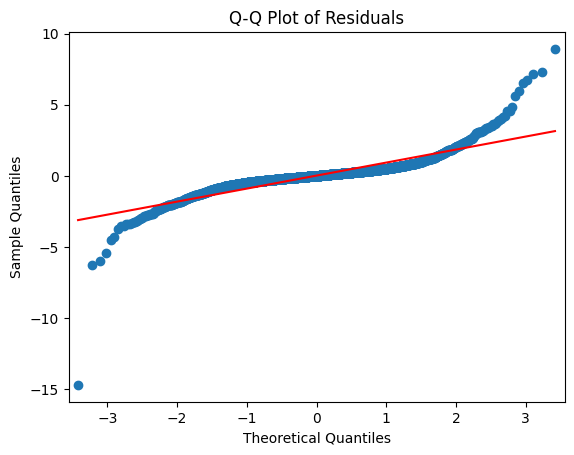

Ljung-Box Test Results:
       lb_stat     lb_pvalue
10  223.198881  2.286233e-42
15  246.728667  5.854032e-44
20  260.809686  7.491588e-44


In [ ]:
# Perform residual analysis for the fitted DLM model

# Step 1: Extract residuals from the fitted model
dlm_residuals = dlm_results.resid

# Step 2: Import necessary libraries for analysis
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Plot the residuals over time
plt.figure(figsize=(10, 5))
plt.plot(dlm_residuals)
plt.title("Residuals of DLM Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

# Step 3: Plot the ACF and PACF of the residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.tsa.plot_acf(dlm_residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(dlm_residuals, lags=40, ax=ax[1])
ax[0].set_title("ACF of Residuals")
ax[1].set_title("PACF of Residuals")
plt.show()

# Step 4: Q-Q plot to check normality of residuals
plt.figure(figsize=(6, 6))
sm.qqplot(dlm_residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Step 5: Perform the Ljung-Box test on the residuals to check for autocorrelation
# You can specify different lags for the test
ljung_box_test = acorr_ljungbox(dlm_residuals, lags=[10, 15, 20], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_test)
